# Video reading and writing

In this notebook I learn about the :
1. Reading from a webcam
2. Read the video
3. Write a video
4. Video filtering in web cam

## Importing the library

In [2]:
import cv2
import matplotlib.pyplot as plt

## Reading from a web cam

To read the video file in the opencv we use `VideoCapture()` function, if `0` is the argument then it is webcam is the source.
If can also accepts path as argument

In [4]:
source = cv2.VideoCapture(0) # 0 means webcam
window_name = "Web cam"
cv2.namedWindow(window_name,cv2.WINDOW_NORMAL)

while cv2.waitKey(1) != 27: # escape key
    has_frame,frame = source.read()
    if not has_frame:
        break
    cv2.imshow(window_name,frame)

source.release()
cv2.destroyWindow(window_name)

## Reading a video file

In [5]:
source = 'images/car_moving.mp4'
cap = cv2.VideoCapture(source)

if not cap.isOpened():
    print("Error opening video stream or file")

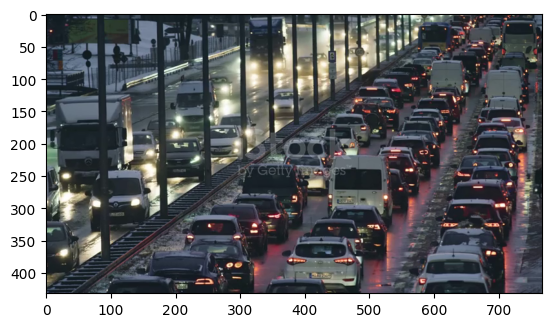

In [8]:
# reading the first frame
ret, frame = cap.read()
plt.imshow(frame[...,::-1])

## Writing a file

To write a file, we use `VideoWriter` and the parameters are :
1. filename - output file name
2. fourcc - it is a 4 character codec code that is used to compress the video format, for example : `VideoWriter::fourcc('P','I','M','1')` is a MPEG-1 codec and `VideoWriter::fourcc('M','J','P','G')` is a motion-jpeg codec.
3. fps - frames per second
4. frameSize - size of the frame

In [9]:
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

out_avi = cv2.VideoWriter("images/race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

while cap.isOpened(): # until the file is complete reading (till end)
    ret, frame = cap.read() # reading frame by frame
    if ret:
        out_avi.write(frame) # writing the file
    else:
        break

cap.release()
out_avi.release()

## Video filtering in webcam

In [14]:
# Filters
PREVIEW = 0  
BLUR = 1  
FEATURES = 2  
CANNY = 3  
feature_params = dict(maxCorners=500, qualityLevel=0.2, minDistance=15, blockSize=9)
image_filter = PREVIEW
alive = True
source = cv2.VideoCapture(0)

if not source.isOpened():
    print("Error: Could not open video source.")
    source.release()
    exit()
win_name = "Live Camera Filters"
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)

while alive:
    has_frame, frame = source.read()
    if not has_frame:
        print("Error: Couldn't capture frame.")
        break

    frame = cv2.flip(frame, 1)

    if image_filter == PREVIEW:
        result = frame
    elif image_filter == CANNY:
        result = cv2.Canny(frame, 80, 150)
    elif image_filter == BLUR:
        result = cv2.blur(frame, (13, 13))
    elif image_filter == FEATURES:
        result = frame.copy()
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corners = cv2.goodFeaturesToTrack(frame_gray, **feature_params)
        if corners is not None:
            for x, y in np.float32(corners).reshape(-1, 2):
                cv2.circle(result, (int(x), int(y)), 10, (0, 255, 0), 1)
    cv2.imshow(win_name, result)
    
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q") or key == 27:  # Quit on 'q' or ESC
        alive = False
    elif key == ord("c"):
        image_filter = CANNY
    elif key == ord("b"):  
        image_filter = BLUR
    elif key == ord("f"): 
        image_filter = FEATURES
    elif key == ord("p"):
        image_filter = PREVIEW

# Release resources
source.release()
cv2.destroyAllWindows()
print("Video Capture Stopped.")

Video Capture Stopped.
